In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
def Show_history(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="Training accuracy")
  plt.plot(epochs_range, val_acc, label="Validation accuracy")
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="Training loss")
  plt.plot(epochs_range, val_loss, label="Validation loss")
  plt.legend(loc="upper right")
  plt.title("Training and validation losses")
  plt.show()

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos.tar", origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')
data_dir = data_dir / 'flower_photos'

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


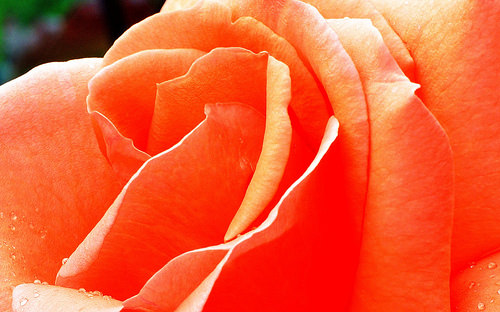

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

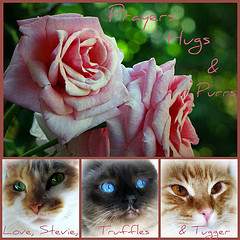

In [ ]:
PIL.Image.open(str(roses[4]))

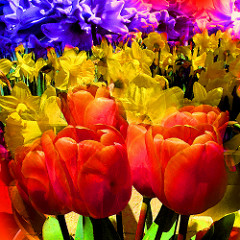

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
len(train_ds)

92

In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


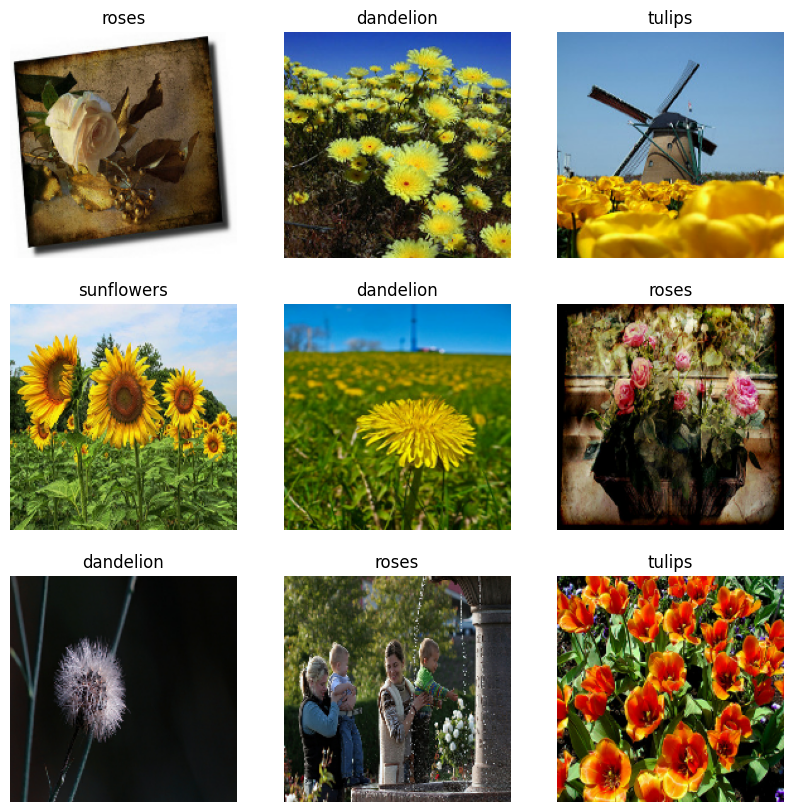

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalization_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalization_ds))
first_image=image_batch[0]
print(np.min(first_image), np. max(first_image))

0.0 0.96902645


In [ ]:
model = Sequential()

#model.add(layers.Input(shape=(img_height, img_width, 3))
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.3177 - loss: 1.6211 - val_accuracy: 0.5204 - val_loss: 1.1191
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.5837 - loss: 1.0446 - val_accuracy: 0.6267 - val_loss: 0.9515
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6780 - loss: 0.8471 - val_accuracy: 0.6281 - val_loss: 0.9660
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7398 - loss: 0.6599 - val_accuracy: 0.6458 - val_loss: 0.9329
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8522 - loss: 0.4127 - val_accuracy: 0.6199 - val_loss: 1.0871
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9123 - loss: 0.2602 - val_accuracy: 0.6308 - val_loss: 1.2711
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9616 - loss: 0.1338 - val_accuracy: 0.6226 - val_loss: 1.4512
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9678 - loss: 0.1087 - val_accuracy: 0.6322 -

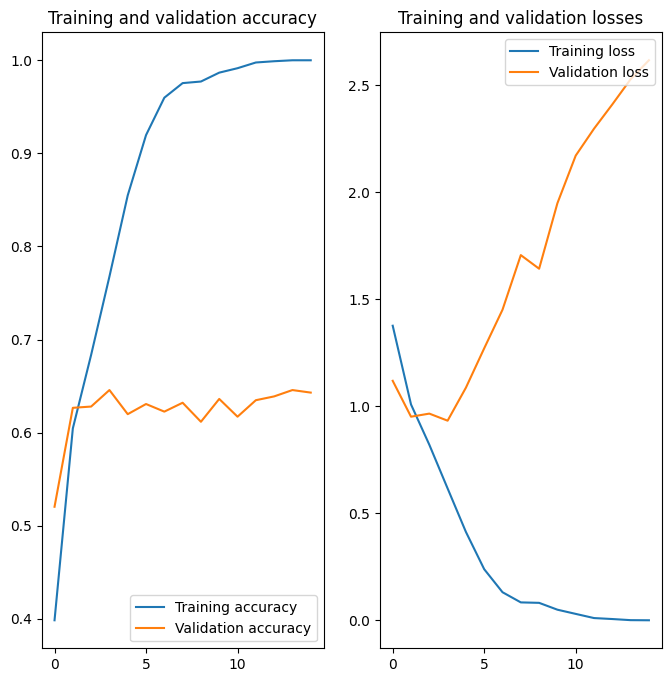

In [ ]:
Show_history(history, 15)

In [ ]:
data_augmenatation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential()

model.add(data_augmenatation)

model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.3654 - loss: 1.5764 - val_accuracy: 0.5817 - val_loss: 1.0828
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5469 - loss: 1.0801 - val_accuracy: 0.6035 - val_loss: 0.9828
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.6255 - loss: 0.9326 - val_accuracy: 0.6567 - val_loss: 0.8531
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6749 - loss: 0.8647 - val_accuracy: 0.6608 - val_loss: 0.8433
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.6984 - loss: 0.7897 - val_accuracy: 0.6826 - val_loss: 0.8433
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7125 - loss: 0.7503 - val_accuracy: 0.6894 - val_loss: 0.7963
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7255 - loss: 0.6999 - val_accuracy: 0.7207 - val_loss: 0.6991
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7379 - loss: 0.6977 - val_accuracy: 0.7371 

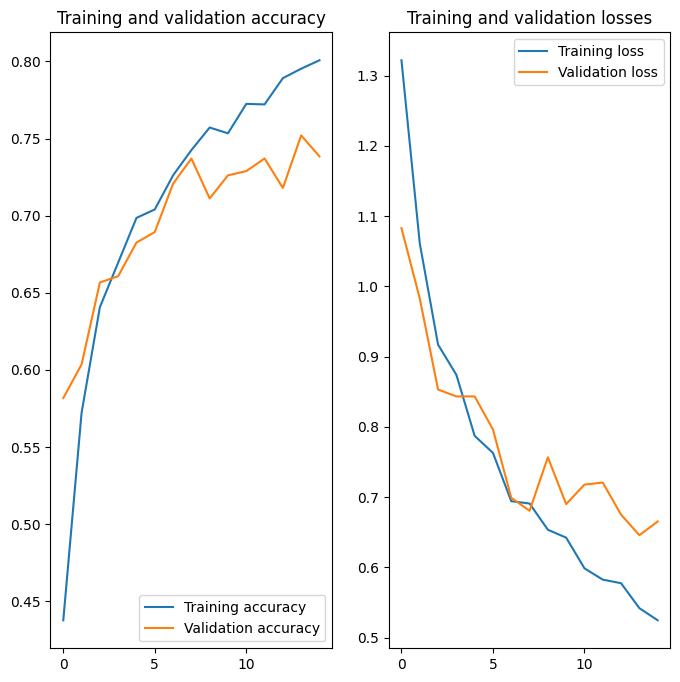

In [ ]:
Show_history(history, 15)

In [ ]:

img = tf.keras.utils.load_img(
   '/1200px-POL_Brzezówka_Drzewo.jpg' , target_size=(img_height, img_width)
)

img_array=tf.keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array, 0)


predictions = model.predict(img_array)


print("This image most likely is a: {} a {:.2f} percent confidance."
.format(class_names[np.argmax(predictions)], np.max(predictions))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This image most likely is a: sunflowers a 0.95 percent confidance.
